[E-01]classiffication :
 - 목적 : 사이킷런으로 머신러닝 모델을 구현하여 분류문제를 풀어보자.
 - 활용데이터 : 손글씨, 와인, 유방암 데이터 
 - 과정 : 각 데이터를 DecisionTree, RandomForest, SVM, SGD, LogisticRegression 5가지 모델을 적용하여 결과를 비교해본다.

# 0. 공통 활용 모듈 import

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier, LogisticRegression

# 1. 손글씨 분류하기 : load_digits

## (1) Load data

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

digits.keys() # digits 데이터의 구성 1 depth

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

## (2) 데이터 이해하기 
    - Feature Data 지정하기
    - Label Data 지정하기
    - Target Names 출력해 보기
    - 데이터 Describe 해 보기

In [3]:
digits_data = digits.data  # feature data 변수저장
digits_label = digits.target # label이 되어있는 target컬럼
print(digits.target_names) # 실제 예측해야하는 라벨값 확인   

[0 1 2 3 4 5 6 7 8 9]


### 데이터의 생김새를 알아보자.

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

---
- 10개의 클래스가 있는 64개 컬럼으로 구성된 이미지 데이터이며, 총 1797개의 데이터가 있다. 
- target 이 [0,1,2,3,4,5,6,7,8,9] array이므로 0~9까지의 숫자 이미지일 것이다. 
- 이미지 파일은 64개의 2차원 숫자 array로 되어있다. 즉, 8x8 의 이미지이다.
- 그렇다면 이미지를 어떻게 확인해볼수 있을까.
---

In [5]:
print(len(digits.feature_names)) 
digits.feature_names 
# 즉 feature names 는 각 픽셀의 값을 의미한다. 

64


['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [6]:
# 실제 데이터는 이렇게 생겼다.를 확인한는 작업. 

digits_data.shape #(1797, 64)
digits.images.shape # (1797, 8,8)  -> 8*8 짜리 array는 이미지를 의미하는 것이 맞다! 
digits_data[0].shape #(64,)
digits.images[0].shape # (8,8) -> 진짜 맞다! 
np.array(digits.images[0])==digits_data[0].reshape(8,8)  # 같다! 


array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]])

이제 0번째 이미지는 어떤 숫자인지 알아보자. 

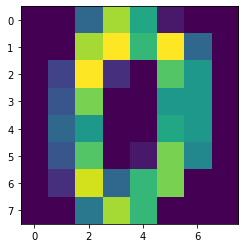

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(digits.images[0])
plt.show()  # 0 이구나.


#### 즉, 각 픽셀의 값을 이용해서 해당 이미지가 어떤 숫자인지 맞춰보자! 는 것이다.

## (3) 다양한 모델로 학습시켜보기 
    - Decision Tree
    - Random Forest
    - SVM 
    - SGD Classifier
    - Logistic Regression

### (3-0) train, test 데이터 분리

In [8]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=10) 

### (3-1) Decision Tree

In [9]:
decision_tree = DecisionTreeClassifier(random_state=10) 
decision_tree.fit(X_train, y_train) 
y_tree_pred = decision_tree.predict(X_test) 

print(classification_report(y_test, y_tree_pred)) 

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        37
           1       0.91      0.91      0.91        34
           2       0.81      0.88      0.85        34
           3       0.79      0.85      0.82        40
           4       0.73      0.79      0.76        34
           5       0.91      0.91      0.91        32
           6       0.94      0.92      0.93        37
           7       0.95      0.88      0.91        40
           8       0.74      0.70      0.72        33
           9       0.81      0.77      0.79        39

    accuracy                           0.85       360
   macro avg       0.85      0.85      0.85       360
weighted avg       0.86      0.85      0.85       360



### (3-2) Random Forest

In [10]:
random_forest = RandomForestClassifier(random_state=10) 
random_forest.fit(X_train, y_train) 
y_random_pred = random_forest.predict(X_test) 
 
print(classification_report(y_test, y_random_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.94      0.91      0.93        34
           2       0.97      1.00      0.99        34
           3       0.97      0.97      0.97        40
           4       0.97      0.94      0.96        34
           5       0.94      1.00      0.97        32
           6       1.00      1.00      1.00        37
           7       0.93      1.00      0.96        40
           8       0.94      0.91      0.92        33
           9       1.00      0.95      0.97        39

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



### (3-3) SVM 

In [11]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train) 
y_svm_pred = svm_model.predict(X_test) 

print(classification_report(y_test, y_svm_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      1.00      0.99        34
           2       0.97      1.00      0.99        34
           3       1.00      0.97      0.99        40
           4       1.00      0.94      0.97        34
           5       0.97      1.00      0.98        32
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        40
           8       0.91      0.97      0.94        33
           9       1.00      0.95      0.97        39

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



### (3-4) SGD Classifier

In [12]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train) 
y_sgd_pred = sgd_model.predict(X_test) 

print(classification_report(y_test, y_sgd_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.83      0.88      0.86        34
           2       0.89      1.00      0.94        34
           3       0.95      0.95      0.95        40
           4       0.97      0.91      0.94        34
           5       0.97      0.88      0.92        32
           6       1.00      0.97      0.99        37
           7       0.97      0.97      0.97        40
           8       0.94      0.91      0.92        33
           9       0.93      0.95      0.94        39

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.95      0.94      0.94       360



### (3-5) Logistic Regression

In [13]:
import warnings
warnings.filterwarnings(action='ignore') # 경고메시지가 보기 좋지 않아 제거함.

logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000)
logistic_model.fit(X_train, y_train) 
y_logistic_pred = logistic_model.predict(X_test) 

print(classification_report(y_test, y_logistic_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.88      0.90        34
           2       0.92      1.00      0.96        34
           3       1.00      0.95      0.97        40
           4       0.91      0.94      0.93        34
           5       0.94      0.94      0.94        32
           6       0.97      0.97      0.97        37
           7       0.97      0.97      0.97        40
           8       0.89      0.94      0.91        33
           9       1.00      0.92      0.96        39

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



## (4) 모델을 평가해 보기

#### 위 다섯가지 모델의 report를 볼때, 전체 성능이 가장 좋은 것은 SVM 인것으로 보인다. (accuracy = 0.98)
    실제로 이 모델의 성능을 종합적으로 계산해보자. 
   

In [14]:
# sklearn에서 제공하는 평가 metrics 를 이용하면 계산할 수 있다. 

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# y_test, y_svm_pred
print('Accuracy:', accuracy_score(y_test, y_svm_pred))
print('Precision:', precision_score(y_test, y_svm_pred, average = 'macro'))
print('Recall:', recall_score(y_test, y_svm_pred, average = 'macro'))
print('F1_SCORE:', f1_score(y_test, y_svm_pred, average = 'macro', zero_division =1))

Accuracy: 0.9833333333333333
Precision: 0.9826839826839826
Recall: 0.9834591389003154
F1_SCORE: 0.9827529300332426


***

# 2. 와인 분류하기 : load_wine

## (1) Load data

In [15]:
from sklearn.datasets import load_wine

wine = load_wine()

wine.keys() # wine 데이터의 구성 1 depth

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

## (2) 데이터 이해하기 
    - Feature Data 지정하기
    - Label Data 지정하기
    - Target Names 출력해 보기
    - 데이터 Describe 해 보기

In [16]:
wine_data = wine.data    # feature data 변수저장
wine_label = wine.target # label이 되어있는 target
wine.target_names        # 실제 예측해야하는 라벨값 확인  

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### 데이터의 생김새를 알아보자.

In [17]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

---
- 3개의 클래스가 있는 13개 컬럼으로 구성된 데이터이며, 총 178개의 데이터가 있다. 
- target 이 ['class_0', 'class_1', 'class_2'] array이므로 3가지 종류 와인을 나타낼 것이다. 
- 모든 컬럼이 어떻게 구성되어있는지 살펴볼 필요가 있다. 이유는, 와인의 클래스를 예측하는데 각 정보가 어떤 형태인지 알아야 하므로! 
---

### 우선 이 데이터를 DataFrame 형태로 저장하여, 세부정보를 살펴보자 (pandas 의 기능을 활용해서 손쉽게 살펴보기 위함.)

In [18]:

print(wine.feature_names) # 13개 컬럼 확인. 

wine_df = load_wine(as_frame=True) # 은정님이 데이터 확인할때 유용한 정보 알려주셨다! :)
wine_df.data


['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [19]:
wine_df.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

#### 모든 컬럼의 데이터타입이 null값 없이 float64이므로, 곧바로 모델에 적용 가능하다! 

즉, 13개의 특징을 가지고, 각 row의 와인이  ['class_0', 'class_1', 'class_2'] 중 어떤 클래스인지 맞춰보자!  는 것이다.

## (3) 다양한 모델로 학습시켜보기 
    - Decision Tree
    - Random Forest
    - SVM 
    - SGD Classifier
    - Logistic Regression

### (3-0) train, test 데이터 분리

In [20]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=5) 

### (3-1) Decision Tree

In [21]:
decision_tree = DecisionTreeClassifier(random_state=20) 
decision_tree.fit(X_train, y_train) 
y_pred = decision_tree.predict(X_test) 

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        17
           1       0.71      0.91      0.80        11
           2       1.00      0.88      0.93         8

    accuracy                           0.86        36
   macro avg       0.88      0.87      0.87        36
weighted avg       0.88      0.86      0.87        36



### (3-2) Random Forest

In [22]:
random_forest = RandomForestClassifier(n_estimators=13, random_state=20)  # 우선 각 특징 컬럼 갯수대로 estimator를 설정했다. 의미가 있는지는 모르겠다^^
random_forest.fit(X_train, y_train) 
y_random_pred = random_forest.predict(X_test) 

print(classification_report(y_test, y_random_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### (3-3) SVM 

In [23]:
svm_model = svm.SVC() 
svm_model.fit(X_train, y_train) 
y_svm_pred = svm_model.predict(X_test) 

print(classification_report(y_test, y_svm_pred)) 

              precision    recall  f1-score   support

           0       0.86      0.71      0.77        17
           1       0.69      0.82      0.75        11
           2       0.44      0.50      0.47         8

    accuracy                           0.69        36
   macro avg       0.66      0.67      0.66        36
weighted avg       0.72      0.69      0.70        36



### (3-4) SGD Classifier

In [24]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train) 
y_sgd_pred = sgd_model.predict(X_test) 

print(classification_report(y_test, y_sgd_pred))

              precision    recall  f1-score   support

           0       1.00      0.59      0.74        17
           1       0.42      1.00      0.59        11
           2       0.00      0.00      0.00         8

    accuracy                           0.58        36
   macro avg       0.47      0.53      0.45        36
weighted avg       0.60      0.58      0.53        36



### (3-5) Logistic Regression

In [25]:
logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000)
logistic_model.fit(X_train, y_train) 
y_logistic_pred = logistic_model.predict(X_test) 

print(classification_report(y_test, y_logistic_pred)) 

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.83      0.91      0.87        11
           2       1.00      0.88      0.93         8

    accuracy                           0.92        36
   macro avg       0.92      0.91      0.91        36
weighted avg       0.92      0.92      0.92        36



## (4) 모델을 평가해 보기

#### 위 다섯가지 모델의 report를 볼때, 전체 성능이 가장 좋은 것은 RandomForest 인것으로 보인다. (accuracy = 1.0)
    실제로 이 모델의 성능을 종합적으로 계산해보자. 

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# y_test, y_random_pred
print('Accuracy:', accuracy_score(y_test, y_random_pred))
print('Precision:', precision_score(y_test, y_random_pred, average = 'macro'))
print('Recall:', recall_score(y_test, y_random_pred, average = 'macro'))
print('F1_SCORE:', f1_score(y_test, y_random_pred, average = 'macro', zero_division =1))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1_SCORE: 1.0


위 결과는 전부 1.0 이라서 의미가 없으므로, randomforest 모델을 시각화해보기로 했다. 

In [27]:
!pip install graphviz

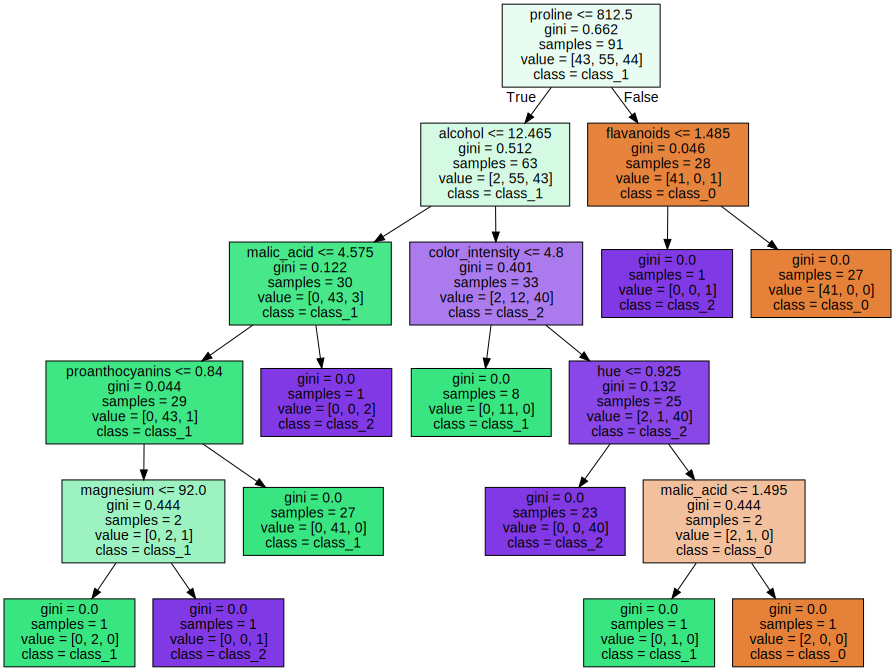

In [28]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(random_forest.estimators_[0], out_file="ranonforest_0_winetree.dot", class_names=wine.target_names,
                feature_names = wine.feature_names, impurity=True, filled=True)

import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("ranonforest_0_winetree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

***

# 3. 유방암 여부 진단하기 : load_breat_cancer

## (1) Load data

In [29]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

cancer.keys() # cancer 데이터의 구성 1 depth

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

## (2) 데이터 이해하기 
    - Feature Data 지정하기
    - Label Data 지정하기
    - Target Names 출력해 보기
    - 데이터 Describe 해 보기

In [30]:
cancer_data = cancer.data     # feature data 변수저장
cancer_label = cancer.target  # label이 되어있는 target
cancer.target_names           # 실제 예측해야하는 라벨값 확인  

array(['malignant', 'benign'], dtype='<U9')

### 데이터의 생김새를 알아보자.

In [31]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

---
- 2개의 클래스가 있는 30개 컬럼으로 구성된 데이터이며, 총 569개의 데이터가 있다. 
- target 이 ['malignant', 'benign'] array이므로 유방암 T/F 여부를 나타낸다. 
- 마찬가지로 모든 컬럼이 어떻게 구성되어있는지 살펴볼 필요가 있다. 이유는, 와인데이터를 살펴볼 때와 같다! 
---

In [32]:
print(cancer.feature_names) # 30개 컬럼 확인. 

cancer_df = load_breast_cancer(as_frame=True) 
cancer_df.data


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [33]:
cancer_df.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

#### 모든 컬럼의 데이터타입이 null값 없이 float64이므로, 곧바로 모델에 적용 가능하다! 

즉, 30개의 특징을 가지고, 각 row의 환자가 ['malignant', 'benign'] 중 어떤 클래스인지 맞춰보자!  는 것이다.

## (3) 다양한 모델로 학습시켜보기 
    - Decision Tree
    - Random Forest
    - SVM 
    - SGD Classifier
    - Logistic Regression

### (3-0) train, test 데이터 분리

In [34]:
X_train, X_test, y_train, y_test = train_test_split(cancer_data, 
                                                    cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=12) 

### (3-1) Decision Tree

In [35]:
decision_tree = DecisionTreeClassifier(random_state=50) 
decision_tree.fit(X_train, y_train) 
y_tree_pred = decision_tree.predict(X_test) 

print(classification_report(y_test, y_tree_pred)) 

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        48
           1       0.94      0.97      0.96        66

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



### (3-2) Random Forest

In [36]:
random_forest = RandomForestClassifier(n_estimators=30, random_state=50)
random_forest.fit(X_train, y_train) 
y_random_pred = random_forest.predict(X_test) 

print(classification_report(y_test, y_random_pred)) 

              precision    recall  f1-score   support

           0       0.98      0.88      0.92        48
           1       0.92      0.98      0.95        66

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



### (3-3) SVM 

In [37]:
svm_model = svm.SVC() 
svm_model.fit(X_train, y_train) 
y_svm_pred = svm_model.predict(X_test) 

print(classification_report(y_test, y_svm_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        48
           1       0.84      1.00      0.91        66

    accuracy                           0.89       114
   macro avg       0.92      0.86      0.88       114
weighted avg       0.90      0.89      0.88       114



### (3-4) SGD Classifier

In [38]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train) 
y_sgd_pred = sgd_model.predict(X_test) 

print(classification_report(y_test, y_sgd_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        48
           1       0.80      1.00      0.89        66

    accuracy                           0.86       114
   macro avg       0.90      0.83      0.85       114
weighted avg       0.89      0.86      0.85       114



### (3-5) Logistic Regression

In [39]:
logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000)
logistic_model.fit(X_train, y_train) 
y_logistic_pred = logistic_model.predict(X_test) 
 
print(classification_report(y_test, y_logistic_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        48
           1       0.90      1.00      0.95        66

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



## (4) 모델을 평가해 보기

#### 위 다섯가지 모델의 report를 볼때, DecisionTree, RandomForest, LogisticRegression 이 대체로 좋게 나왔다. 
#### 하지만, 무엇이 가장 좋은 성능을 내는 모델인지 고르기 어려웠다. 
### 따라서, 각 지표에서 recall, f1-score, precision 의 의미를 살펴보고 , 유방암 진단과 같은 문제는 어떤 지표를 중요하게 생각해야하는지 살펴보았다. 


#### recall, f1, precicion을 구성하는 각 의미를 살펴보자. 
##### confusuion matrix 구성 요소는 4가지 이다. 
- TP : True Positive. 실제 True인 정답을 True라고 예측 (정답)
- FP : False Positive. 실제 False인 정답을 True라고 예측 (오답)
- TN : True Negative. 실제 False인 정답을 False라고 예측 (정답)
- FN : False Positive. 실제 True인 정답을 False라고 예측 (오답)

### confusuion matrix 에서 성능평가지표는 다음으로 구성된다. 
- recall : 실제 true 인 것중에서 모델이 true라고 예측한 것의 비율 
$$ recall = \frac{TP}{TP + FN}$$



- precision : 모델이 true 라고 분류한 것 중에서 실제 true인 것의 비율
$$ precision = \frac{TP}{TP + FP}$$



- f1-score : recall 과 precision 의 조화평균
$$ f1 = 2* \frac{precision * recall}{precision + recall}$$

#### [결론] 유방암 진단과 같은 문제는 '실제로 질병이 없는데 있다고 예측'하는 것 보다 '실제로 질병이 있는데 없다고 예측' 하는 것이 아주 치명적이다.  
#### 즉, recall 이 가장 높은 것! 다시 말해 TP가 높은 것을 주로 보는 것보다(정답을 맞추는 것), FN이 낮은 모델을 선택하는 것이 가장 좋다고 판단했다. 

- 3가지 모델 recall , precision 결과 : 

In [40]:
# y_test, y_tree_pred
print('==== DecisionTree ====')
print('Precision:', precision_score(y_test, y_tree_pred, average = 'macro'))
print('Recall:', recall_score(y_test, y_tree_pred, average = 'macro'))

# y_test, y_random_pred
print('\n==== RandomForest ====')
print('Precision:', precision_score(y_test, y_random_pred, average = 'macro'))
print('Recall:', recall_score(y_test, y_random_pred, average = 'macro'))


# y_test, y_logistic_pred
print('\n==== LosgisticRegression ====')
print('Precision:', precision_score(y_test, y_logistic_pred, average = 'macro'))
print('Recall:', recall_score(y_test, y_logistic_pred, average = 'macro'))


==== DecisionTree ====
Precision: 0.948849104859335
Recall: 0.9431818181818181

==== RandomForest ====
Precision: 0.9461185718964953
Recall: 0.9299242424242424

==== LosgisticRegression ====
Precision: 0.952054794520548
Recall: 0.9270833333333333


#### 따라서 위 5가지 모델 중, DecisionTree 가 가장 잘 예측했다고 볼 수 있다. (왜냐하면, recall이 가장 높고, FN의 비율이 가장 낮기 때문이다!) 

# 4. 회고 

- 분석에 앞서 데이터를 살펴보는 것이 어려웠다. 어떤 인사이트를 갖고 어느부분을 파헤쳐 보아야 하는지 알지 못한 채, 데이터의 모든 깊이를 탐색하는 것이 가장 오랜 시간이 걸렸다. 물론 지금은 데이터마다 목적이 분명했고 명확한 라벨링이 있었기 때문에 target를 정하는 것이 그리 어렵지 않았지만, 실제 비정형데이터를 가지고 '이 데이터로는 이걸 해야겠다'라는 인사이트를 얻어내기 위해서는 상당히 많은 경험이 필요할 것으로 생각된다. 
- 데이터를 뜯어보면서 좋았던 점은 데이터의 구성을 어떻게 해야 접근하기 용이한가를 엔지니어링 역량측면에서 생각해야겠다는 다짐을 하게 되어서 좋았다. 
- 이번 프로젝트는 5가지 모델을 적용한 이후, 결과를 비교하는 기준을 무엇으로 잡을 것인가에 대해 고민해볼 수 있는 좋은 기회였다. 
- 더욱 복잡한 문제일 수록 해석에 따라 결과가 달라지겠지만, 각 feature 의 중요도를 따져보고 싶었는데 시간이 많이 부족했다. 
- 더 좋은 예측 결과를 위해서 어떤 고민을 해야하는지 아직은 답을 모르겠다. 
- 각 문제에 대해서 평가지표를 무엇으로 선택할지도 중요한 것을 알았다. 특히 유방암 진단 문제에서 그랬다. 
- 위 코드만으로 예측 결과가 올바르다 라고 판단하기는 어렵지만, 계속해서 깊히 파야겠다. 설득력있는 분석결과를 얻으려면 끝도 없을거 같다. 
- 그래서.. 데이터를 통해 특정 결론을 내리는 것은 너무나도 난해하고 광범위 하고 어렵다고 생각한다. 많은 경험이 필요할 것 같다.